In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('Order1.csv')

In [45]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [46]:
df.shape

(38765, 3)

In [47]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [48]:
transactions = df.groupby(['Member_number','Date'])
transactions.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [49]:
support = (df['itemDescription'].value_counts()/14693*100)
support

itemDescription
whole milk               17.028517
other vegetables         12.917716
rolls/buns               11.679031
soda                     10.304227
yogurt                    9.079153
                           ...    
rubbing alcohol           0.034030
bags                      0.027224
baby cosmetics            0.020418
kitchen utensil           0.006806
preservation products     0.006806
Name: count, Length: 167, dtype: float64

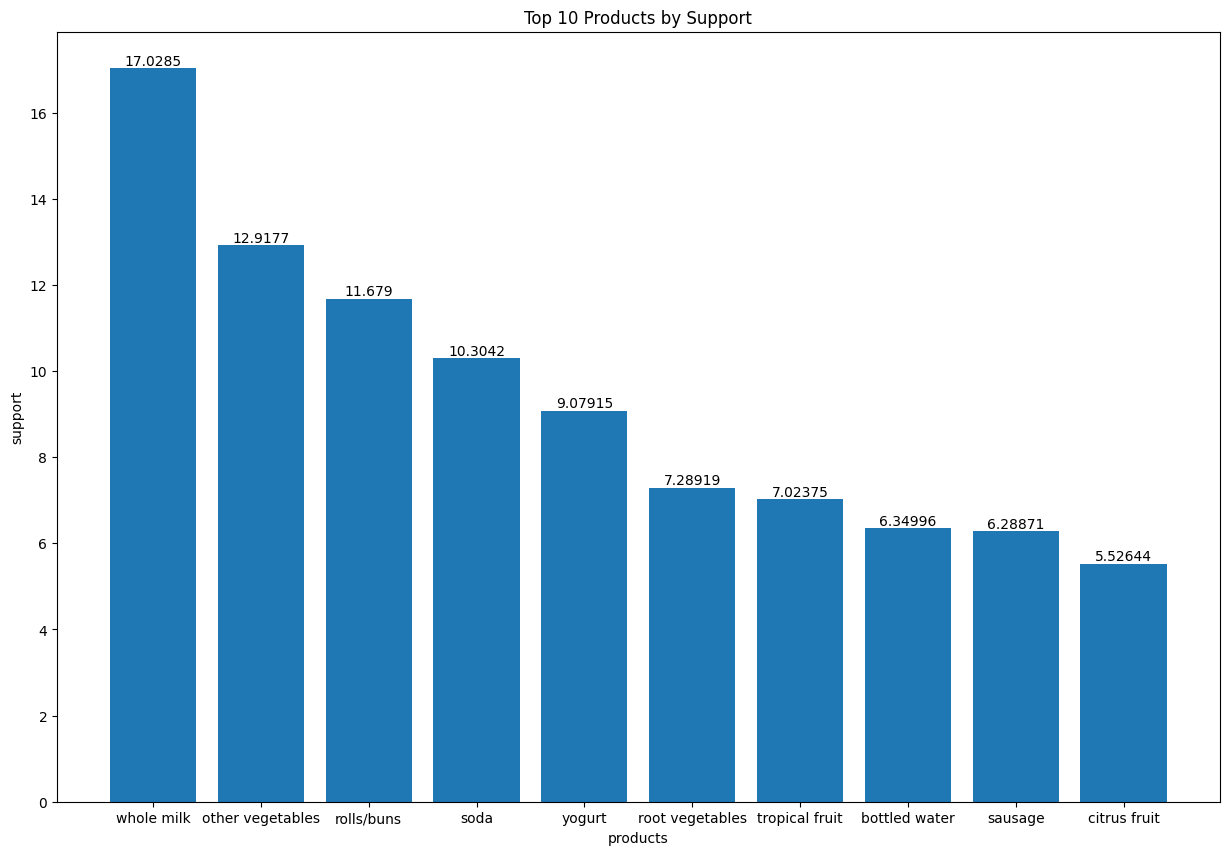

In [71]:
plt.figure(figsize=(15,10))
bars = plt.bar(x=np.arange(len(support.head(10))), height=(support).head(10))
plt.bar_label(bars)
plt.xticks(ticks=np.arange(len(support.head(10))), labels=support.index[:10])
plt.title('Top 10 Products by Support')
plt.xlabel('products')
plt.ylabel('support')
plt.show()


In [73]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [75]:
transactions = df.groupby(['Member_number'])['itemDescription'].apply(list).tolist()
transactions

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [77]:
te = TransactionEncoder()
x = te.fit_transform(transactions)
x

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [79]:
df = pd.DataFrame(x,columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [81]:
frequent_itemsets = apriori(df, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.078502,(UHT-milk)
1,0.119548,(beef)
2,0.079785,(berries)
3,0.062083,(beverages)
4,0.158799,(bottled beer)
...,...,...
243,0.043099,"(root vegetables, whole milk, soda)"
244,0.040021,"(soda, sausage, whole milk)"
245,0.044895,"(yogurt, sausage, whole milk)"
246,0.054387,"(yogurt, whole milk, soda)"


In [83]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.30)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(whole milk),0.078502,0.458184,0.040534,0.516340,1.126928,0.004565,1.120242,0.122227
1,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
2,(beef),(rolls/buns),0.119548,0.349666,0.040534,0.339056,0.969655,-0.001268,0.983946,-0.034324
3,(beef),(soda),0.119548,0.313494,0.042842,0.358369,1.143145,0.005365,1.069939,0.142223
4,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
...,...,...,...,...,...,...,...,...,...,...
206,"(yogurt, whole milk)",(soda),0.150590,0.313494,0.054387,0.361158,1.152042,0.007178,1.074611,0.155374
207,"(yogurt, soda)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,0.009720,1.225537,0.198033
208,"(soda, whole milk)",(yogurt),0.151103,0.282966,0.054387,0.359932,1.271999,0.011630,1.120247,0.251899
209,"(yogurt, tropical fruit)",(whole milk),0.075680,0.458184,0.042329,0.559322,1.220738,0.007654,1.229506,0.195628


In [85]:
rules = rules[['antecedents', 'consequents', 'support', 'confidence']]
rules

,antecedents,consequents,support,confidence
0,(UHT-milk),(whole milk),0.040534,0.516340
1,(beef),(other vegetables),0.050795,0.424893
2,(beef),(rolls/buns),0.040534,0.339056
3,(beef),(soda),0.042842,0.358369
4,(beef),(whole milk),0.064135,0.536481
...,...,...,...,...
206,"(yogurt, whole milk)",(soda),0.054387,0.361158
207,"(yogurt, soda)",(whole milk),0.054387,0.557895
208,"(soda, whole milk)",(yogurt),0.054387,0.359932
209,"(yogurt, tropical fruit)",(whole milk),0.042329,0.559322


In [87]:
rules[rules['antecedents']=={'UHT-milk'}]['consequents']

0    (whole milk)
Name: consequents, dtype: object